In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
import tensorflow as tf

In [76]:
dataset = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
dataset.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [4]:
import matplotlib.pyplot as plt

In [5]:
train = dataset.train
test = dataset.test

In [6]:
image1=dataset.train.images[1]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

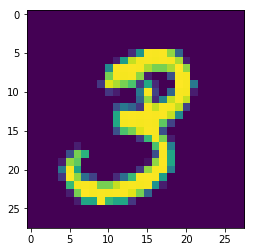

In [7]:
plt.imshow(image1)

In [8]:
train.labels.shape

(55000, 10)

In [62]:
def plot(image, shape):
    image = np.array(image, 'float')
    image= image.reshape(shape)
    plt.imshow(image)
    plt.show()

def layerInMLP(ans, shape):
   # w = sess.run(w)
    #ans = tf.matmul(ans, w)
    ans = sess.run(ans)
    plot(ans[1], shape) 
    return    
    
def layer(ans, w, b, shape):
   # w = sess.run(w)
    ans = tf.add(tf.matmul(ans, w), b)
    ans = tf.nn.relu(ans)
    ans = sess.run(ans)
    #plot(ans[1], shape) 
    return ans
    

def atEachLayer():
    multImgs=[]
    image = train.images
    multImgs.append(image)
    
    w = sess.run(weights['h1'])
    b= sess.run(biases['h1'])
    shape = (18, 19)
    image = layer(image, w, b, shape)  
    multImgs.append(image)

    w = sess.run(weights['h2'])
    b= sess.run(biases['h2'])
    shape = (8, 16)
    image = layer(image, w, b, shape)  
    multImgs.append(image)
    
    w = sess.run(weights['op'])
    b= sess.run(biases['op'])
    shape = (2,5)
    image = layer(image, w, b, shape)  
    multImgs.append(image)
    
    return multImgs
    

In [10]:
n_hidden1 = 342
n_hidden2 = 128
n_input = 784
n_classes = 10

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
    'op':tf.Variable(tf.random_normal([n_hidden2, n_classes]))
}

biases={
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'op':tf.Variable(tf.random_normal([n_classes]))
}


In [11]:
def mlp(x, weights, biases):
    layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])      #xw+b
    layer1 = tf.nn.relu(layer1)
    
    layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['h2'])
    layer2 = tf.nn.relu(layer2)
    
    op_layer = tf.add(tf.matmul(layer2, weights['op']), biases['op'])
    #op_layer = tf.nn.relu(op_layer)
    return op_layer

In [12]:
x = tf.placeholder("float", shape = [None, 784])
y= tf.placeholder(tf.int32, shape =[None, 10])
preds = mlp(x, weights, biases)
preds

<tf.Tensor 'Add_2:0' shape=(?, 10) dtype=float32>

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=preds, labels=y))
optimizer =tf.train.AdamOptimizer(learning_rate=0.01)

In [14]:
optimize = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [77]:
epochs = 25
batch_size = 100
for i in range(epochs):
    total_cost =0
    num_batches = int(train.num_examples/batch_size)
    print('Epoch Number :',i)
    for j in range(num_batches):
        x_batch, y_batch = train.next_batch(batch_size)
        a, c = sess.run([optimize, cost], feed_dict={x:x_batch, y:y_batch})
        total_cost += c
    print("Cost: ",total_cost)

Epoch Number : 0
Cost:  62.09871540203312
Epoch Number : 1
Cost:  57.73525169023924
Epoch Number : 2
Cost:  63.7450565187537
Epoch Number : 3
Cost:  59.376143476576544
Epoch Number : 4
Cost:  50.88204899034099
Epoch Number : 5
Cost:  66.76617377349339
Epoch Number : 6
Cost:  68.20254855271196
Epoch Number : 7
Cost:  49.026300225468276
Epoch Number : 8
Cost:  64.62133826916397
Epoch Number : 9
Cost:  51.35136261358275
Epoch Number : 10
Cost:  62.96054444138281
Epoch Number : 11
Cost:  53.28151638570378
Epoch Number : 12
Cost:  54.10060875416275
Epoch Number : 13
Cost:  63.64941730323744
Epoch Number : 14
Cost:  51.046491334427174
Epoch Number : 15
Cost:  54.353510951505086
Epoch Number : 16
Cost:  50.966264792993854
Epoch Number : 17
Cost:  56.58471376246057
Epoch Number : 18
Cost:  52.57357991858157
Epoch Number : 19
Cost:  53.05908935756994
Epoch Number : 20
Cost:  48.23121127863163
Epoch Number : 21
Cost:  54.44152721614245
Epoch Number : 22
Cost:  63.085749501423834
Epoch Number : 2

In [78]:
predictions = tf.argmax(preds, 1)

In [79]:
correct_labels = tf.argmax(y, 1)

In [80]:
correct_preds = tf.equal(predictions, correct_labels)
correct_ones = sess.run(correct_preds, feed_dict={x:test.images, y:test.labels})
correct_ones.sum()

9691

In [81]:
mImgs = atEachLayer()

Image :  100


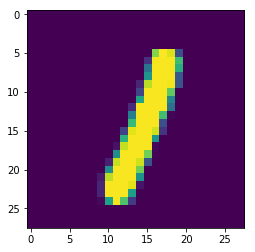

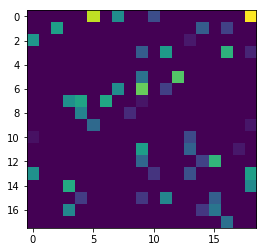

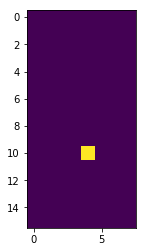

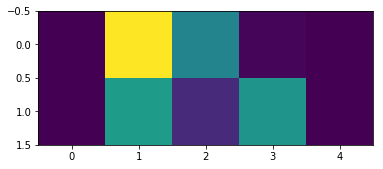

Image :  101


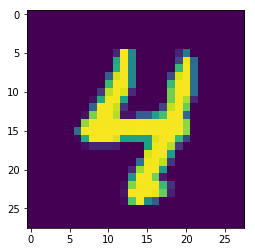

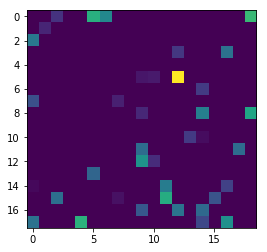

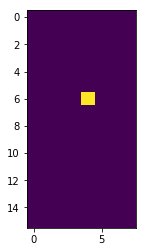

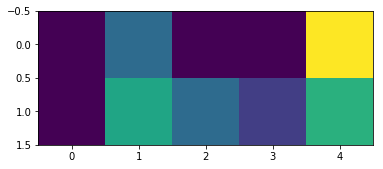

Image :  102


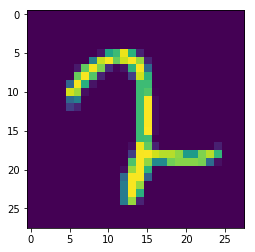

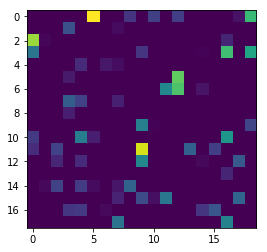

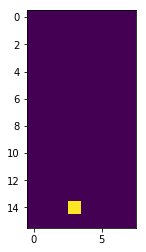

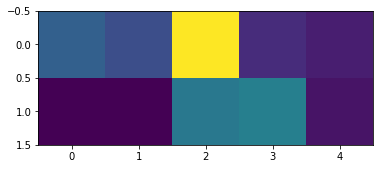

Image :  103


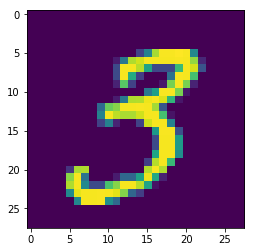

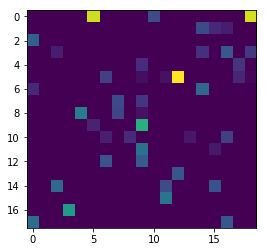

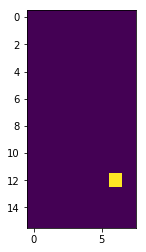

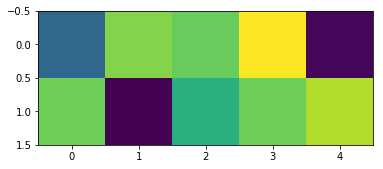

Image :  104


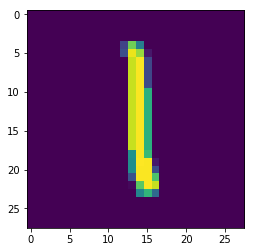

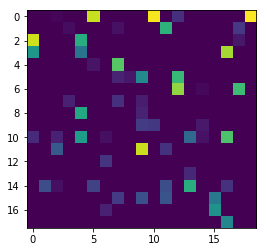

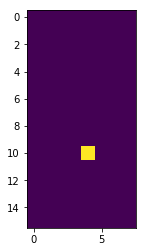

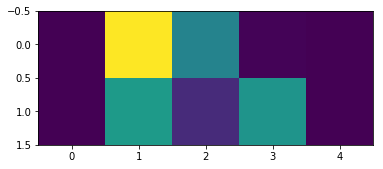

In [85]:
for i in range(100, 105):
    print("Image : ",i)
    img = mImgs[0][i]
    plot(img, (28, 28))
    img = mImgs[1][i]
    plot(img, (18, 19)) 
    img = mImgs[2][i]
    plot(img, (16, 8))
    img = mImgs[3][i]
    plot(img, (2, 5))

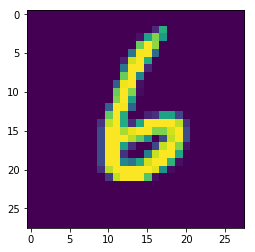

In [83]:
plot(train.images[106], (28, 28))

In [84]:
train.labels[106]
mImgs[3][106]

array([398.89023, 225.21298, 486.96356,   0.     , 439.1684 , 371.29984,
       596.0551 ,   0.     , 484.55212, 335.39117], dtype=float32)